A Series is a one-dimensional array-like object containing 
* a sequence of values (of
similar types to NumPy types) 
* and an associated array of data labels, called its index

In [ ]:
obj = pd.Series([4, 7, -5, 3])
print(obj)

In [ ]:
print(obj.values)

In [ ]:
print(obj.index)

## What is a dataframe?

The primary objects in pandas are 
* the DataFrame, a tabular, column-oriented data structure with both row and column labels,
* and a Series, a one-dimensional labeled array object.

In [250]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data = pd.DataFrame(data)

In [247]:
data.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [242]:
data.columns

Index(['state', 'year', 'pop'], dtype='object')

In [243]:
data['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [244]:
data.state

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

In [246]:
data.iloc[0]

state    Ohio
year     2000
pop       1.5
Name: 0, dtype: object

In [251]:
data = pd.DataFrame(data)
data.drop(['state'], axis = 1, inplace=True)
data.head()

,year,pop
0,2000,1.5
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9


In [252]:
data.describe()

,year,pop
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


In [253]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data.head()


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [254]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [255]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [256]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [257]:
data<5 # filtering

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [258]:
data[data<5] = 0 # filtering and setting new value using boolean operation
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [259]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [260]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [261]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [262]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [263]:
data.sum()

one      20
two      27
three    30
four     33
dtype: int64

In [264]:
data.sum(axis='columns')

Ohio         0
Colorado    18
Utah        38
New York    54
dtype: int64

## Some important pandas methods

![alt text](img/pandas_functions.png "Title")

# Hypothesis testing

## The basis of hypothesis testing has two attributes: (a) Null Hypothesis and (b) Alternative Hypothesis.


## $H_0$: Null hypothesis (no change, no difference);  

## $H_1$: Research hypothesis (investigator's belief); $\alpha$ =0.05


### Upper-tailed, Lower-tailed, Two-tailed Tests

### The research or alternative hypothesis can take one of three forms. An investigator might believe that the parameter has increased, decreased or changed. For example, an investigator might hypothesize:  

H1: μ > μ 0 , where μ0 is the comparator or null value (e.g., μ0 =males weight 10 years ago) and an increase is hypothesized - this type of test is called an upper-tailed test;

H1: μ < μ0 , where a decrease is hypothesized and this is called a lower-tailed test; or

H1: μ ≠ μ 0, where a difference is hypothesized and this is called a two-tailed test.  

The exact form of the research hypothesis depends on the investigator's belief about the parameter of interest and whether it has possibly increased, decreased or is different from the null value. The research hypothesis is set up by the investigator before any data are collected.

 


## If $p>\alpha$, we don't reject the null hypothesis. 
## If $p< \alpha$, we reject the null hypothesis and accept the alternative hypothesis

## Types of errors (Error I and Error II)


### First Case: The person is innocent and the judge identifies the person as innocent
### Second Case: The person is innocent and the judge identifies the person as guilty
### Third Case: The person is guilty and the judge identifies the person as innocent
### Fourth Case: The person is guilty and the judge identifies the person as guilty

## Two Sample Z Test
###  We perform a Two Sample Z test when we want to compare the mean of two samples.

## Example: The diabetes database

### Do males have significantly higher mean Boday Mass Index (BMI) than females?

### Null Hypothesis: $\mu_m = \mu_f$
### Alternative Hypothesis: $\mu_m \neq \mu_f$

In [274]:
dataName = 'nhanes_2015_2016.csv'
df = pd.read_csv(dataName)
df.head(15)


,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


In [273]:
# Print column names
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [275]:
# Check for missing or Nan values
print(df["RIAGENDR"].isnull().values.any())
print(df["BMXBMI"].isnull().values.any())

False
True


In [276]:
BMI_NAN = df["BMXBMI"].isnull()
print(BMI_NAN)

0       False
1       False
2       False
3       False
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Name: BMXBMI, Length: 5735, dtype: bool


In [277]:
df.index[BMI_NAN==True]

Int64Index([ 201,  216,  220,  242,  275,  425,  492,  548,  567,  710,  767,
            1023, 1131, 1178, 1238, 1260, 1334, 1401, 1467, 1635, 1637, 1725,
            1731, 1808, 1809, 1815, 1956, 2010, 2082, 2162, 2173, 2244, 2401,
            2411, 2415, 2646, 2773, 2795, 2855, 2894, 3102, 3119, 3231, 3235,
            3236, 3373, 3398, 3661, 3821, 3887, 4008, 4157, 4213, 4229, 4312,
            4316, 4540, 4690, 4827, 4912, 4930, 4981, 5157, 5213, 5347, 5360,
            5364, 5432, 5574, 5595, 5640, 5696, 5705],
           dtype='int64')

In [278]:
df.dropna(subset=["BMXBMI", "RIAGENDR"])

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [279]:
print(df["BMXBMI"].isnull().values.any())

True


In [280]:
df.dropna(subset=["BMXBMI", "RIAGENDR"], inplace = True)
print(df["BMXBMI"].isnull().values.any())

False
False


In [281]:
males = df[df["RIAGENDR"] == 1]
males.head(20)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0
10,83747,1.0,NaN,1.0,1,1,46,3,1.0,5.0,...,150.0,90.0,86.2,176.7,27.6,41.0,38.0,33.6,104.3,2.0
11,83750,1.0,NaN,3.0,1,1,45,5,1.0,2.0,...,108.0,72.0,76.2,177.8,24.1,43.9,37.8,33.0,90.1,NaN
14,83755,1.0,NaN,3.0,2,1,67,4,1.0,5.0,...,136.0,82.0,97.4,183.8,28.8,42.5,40.6,34.2,106.3,2.0
20,83769,1.0,NaN,2.0,2,1,49,5,1.0,2.0,...,106.0,68.0,72.8,170.7,25.0,42.8,40.0,31.5,96.6,2.0


In [282]:
n1 = len(males)
mu1 = males["BMXBMI"].mean()
sd1 = males["BMXBMI"].std()

(n1, mu1, sd1)

(2718, 28.778072111846942, 6.2525676168014614)

In [283]:
females = df[df["RIAGENDR"] == 2]
females.head(20)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
12,83752,1.0,NaN,2.0,1,2,30,2,1.0,4.0,...,104.0,50.0,71.2,163.6,26.6,37.3,35.7,31.0,90.7,2.0
13,83754,2.0,1.0,1.0,2,2,67,2,1.0,5.0,...,116.0,64.0,117.8,164.1,43.7,34.8,38.6,42.7,123.0,2.0
15,83757,1.0,NaN,1.0,2,2,57,2,1.0,1.0,...,146.0,62.0,80.5,150.8,35.4,31.6,32.7,33.7,113.5,2.0
16,83759,2.0,2.0,NaN,2,2,19,1,1.0,NaN,...,102.0,66.0,100.8,175.4,32.8,40.7,38.6,35.9,104.6,1.0
17,83761,1.0,NaN,1.0,2,2,24,5,2.0,5.0,...,108.0,60.0,61.8,156.4,25.3,37.0,35.5,29.6,79.5,NaN
18,83762,NaN,NaN,NaN,1,2,27,4,1.0,4.0,...,144.0,84.0,107.9,168.5,38.0,40.1,39.0,41.6,114.8,1.0


In [284]:
n2 = len(females)
mu2 = females["BMXBMI"].mean()
sd2 = females["BMXBMI"].std()

(n2, mu2, sd2)

(2944, 29.93994565217391, 7.753318809545674)

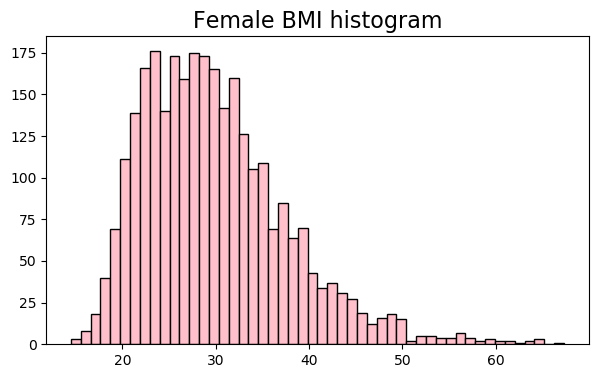

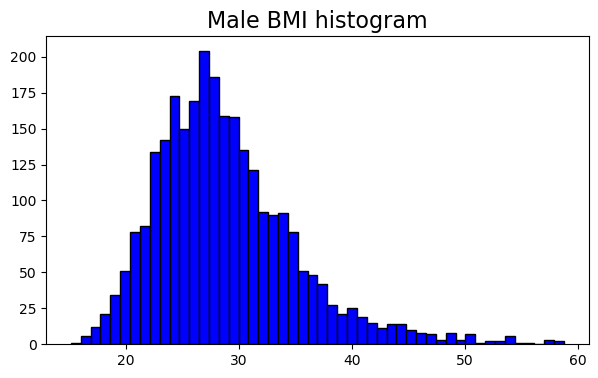

In [286]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=50)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=50)
plt.show()

In [287]:
sm.stats.ztest(females["BMXBMI"], males["BMXBMI"],alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

## What does is p value mean?

## Resources and references: 

### https://wwwn.cdc.gov/nchs/nhanes/Default.aspx

### https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/
### https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_hypothesistest-means-proportions/bs704_hypothesistest-means-proportions3.html

### https://towardsdatascience.com/demystifying-hypothesis-testing-with-simple-python-examples-4997ad3c5294
### https://python4mpia.github.io/fitting_data/least-squares-fitting.html